### Name: Shubham Shetty
### UID: 2018130050
### Batch: B

## Objective:

Perform statistical data analysis such as: Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation, standard error), Main distributions ( Normal distribution, chi-square distribution), Hypothesis testing, pair-wise association (Pearson correlation test, t-test, ANOVA), Non-parametric test (Spearman rank0 etc)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import scipy.stats as st

In [2]:
#Load the dataset

pima_df = pd.read_csv("/content/drive/MyDrive/Data Science Tutorials/diabetes.csv")

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [3]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima_df.shape

(768, 9)

In [5]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# Let us check whether any of the columns has any value other than numeric
#i.e. data is not corrupted such as a "?" instead of a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [8]:
#We come to know that we have 0 values in these columns
#So we replace them with NaN
pima_df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=pima_df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)

In [9]:
pima_df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
#Checking for the missing values in the dataset

pima_df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
#Replacing the null values with the mean and median respectively

pima_df['Glucose'].fillna(pima_df['Glucose'].mean(), inplace = True)
pima_df['BloodPressure'].fillna(pima_df['BloodPressure'].mean(),inplace=True)
pima_df['SkinThickness'].fillna(pima_df['SkinThickness'].median(),inplace=True)
pima_df['Insulin'].fillna(pima_df['Insulin'].median(),inplace=True)
pima_df['BMI'].fillna(pima_df['BMI'].median(),inplace=True)

In [12]:
#Convert the target column to a categorical variable
pima_df['Outcome']=pima_df['Outcome'].astype('category')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


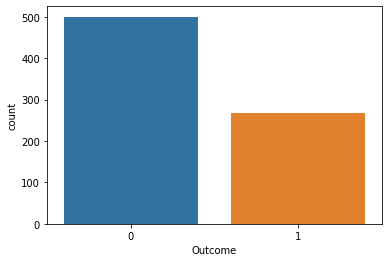

In [13]:
sns.countplot(pima_df['Outcome'])

In [14]:
pima_df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64


The positive class or class 1 (people having diabetes) is 35% and the class 0 is 65%:

### Some Data Visualization

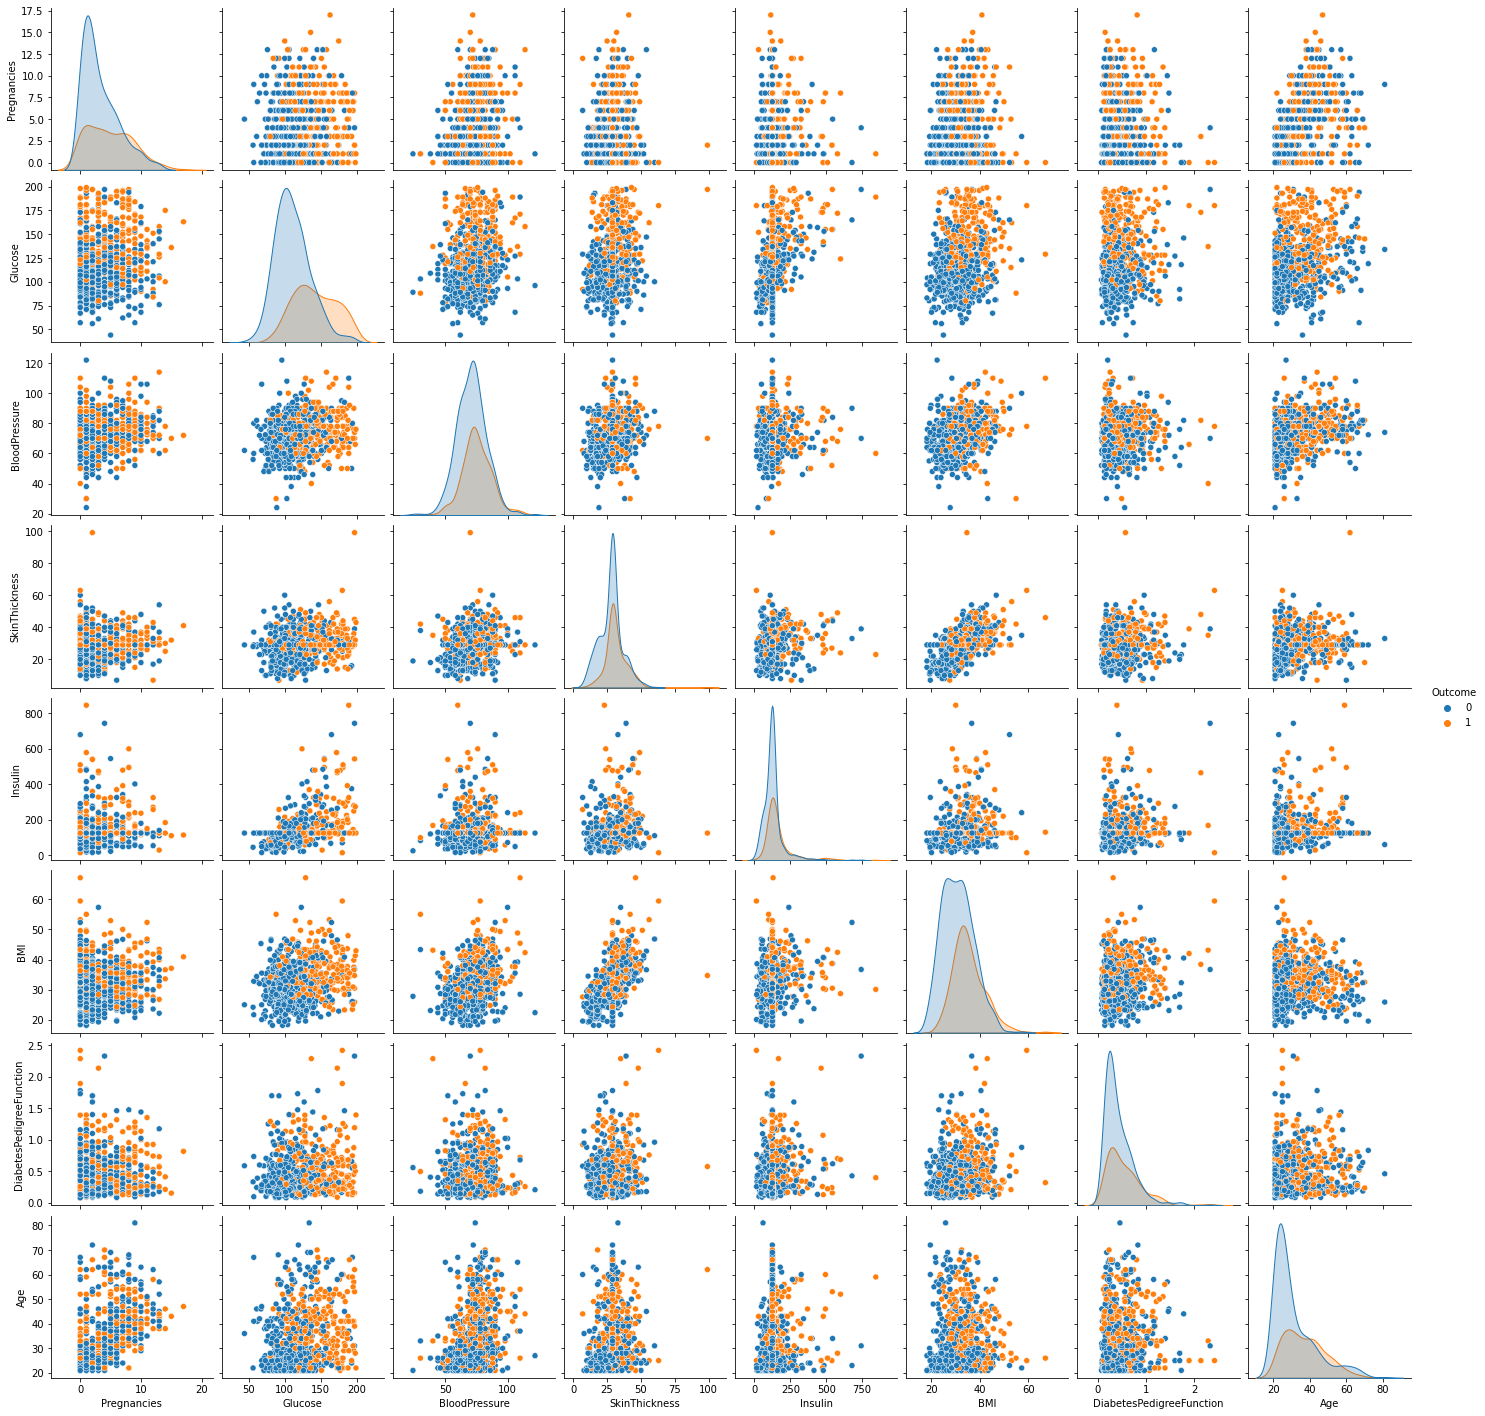

In [15]:
# Pairplot using seaborn

sns.pairplot(pima_df, hue='Outcome')

In [16]:
from scipy.stats import zscore

numeric_cols = pima_df.drop('Outcome', axis=1)

# Copy the 'class' column alone into the y dataframe. This is the dependent variable
class_values = pd.DataFrame(pima_df[['Outcome']])

numeric_cols = numeric_cols.apply(zscore)
pima_df_z = numeric_cols.join(class_values)   

pima_df_z.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496,1


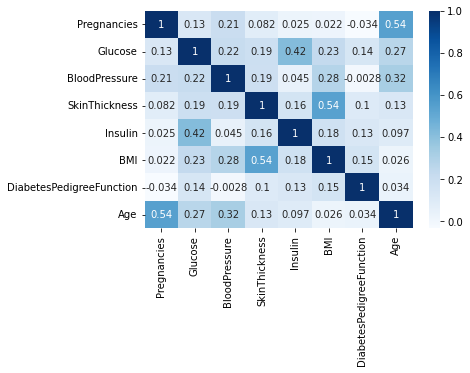

In [17]:
corr = pima_df[pima_df.columns].corr()
sns.heatmap(corr, annot = True,cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe493d89d0>]],
      dtype=object)

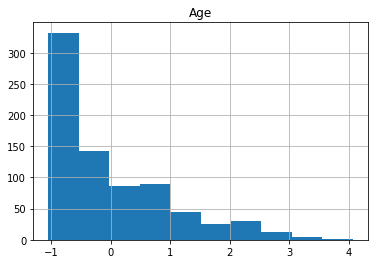

In [18]:
pima_df_z.hist('Age')

## Hypothesis testing


*   Type I error: When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region
*   Type II errors: When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.




*   One tailed test :- A test of a statistical hypothesis , where the region of rejection is on only one side of the sampling distribution , is called a one-tailed test.
Example :- a college has ≥ 4000 student or data science ≤ 80% org adopted.
*   Two-tailed test :- A two-tailed test is a statistical test in which the critical area of a distribution is two-sided and tests whether a sample is greater than or less than a certain range of values. If the sample being tested falls into either of the critical areas, the alternative hypothesis is accepted instead of the null hypothesis.

In [19]:
# H0 - The difference in mean between sample BP column and population mean for BP is a
#statistical fluctuation. The given data represents the population distribution on the BP column

# H1 - The difference in mean between sample BP column and population mean is significant.
#The difference is too high to be result of statistical fluctuation


### T test for checking p value

In [20]:
from scipy.stats import ttest_1samp
import numpy as np

population_bp_mean = np.mean(pima_df['BloodPressure'])
sample_bp = pima_df['BloodPressure'].sample(n=30)
# print(bp_mean)


In [21]:
tset, pval = ttest_1samp(sample_bp, population_bp_mean)
print("p-values",pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Samples are likely drawn from different distributions -> we are rejecting null hypothesis")
else:
  print("Samples are likely drawn from the same distributions -> we are accepting null hypothesis")

p-values 0.10688091625606667
Samples are likely drawn from the same distributions -> we are accepting null hypothesis


## ANOVA
ANOVA (Analysis of Variance) provides a statistical test of whether two or more population means are equal. Assume we want to determine whether multiple groups differ from one another in a measurement.

One-way ANOVA: When you want to test two or more groups to see if there’s a statistical difference between them. Both the t-test and one-way ANOVA test can compare the means for two groups, but only the one-way ANOVA test can compare the means of multiple groups at once.

In [22]:
insurance_df = pd.read_csv("/content/drive/MyDrive/Data Science Tutorials/insurance(1).csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,32,male,28.9,0,no,northwest,3866.86
4,31,female,25.7,0,no,southeast,3756.62


In [24]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different
import copy
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis

female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = st.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.897) > 0.05


## Conclusion


*   Understood why Hypothesis testing is an essential procedure in statistics. A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data.
*   Found one limitation in one way ANOVA test which is that a one-way ANOVA helps us to determine whether the two or more groups are difference from each other, but it never tells you which specific groups were different from one another.

